In [93]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [94]:
df = pd.read_csv('https://gist.githubusercontent.com/andron23/f8f772879116d9743f96917bd2c1ee24/raw/67a2c1e793e61c67bd55b5bc9220e5cc9602cd12/clients.csv')

df

,created_at,utm_source,utm_medium,extra_leads,tag
0,2024-11-27 17:17:00,telegram,bot-send,{17089011},demo-da
1,2024-11-27 18:55:00,telegram,bot-send,{16003203},Кейс-АЦ
2,2024-11-29 08:48:00,unisender,email,{15930477},web-0412
3,2024-11-29 08:53:00,unisender,email,{16016135},web-0412
4,2024-11-29 08:56:00,unisender,email,"{11787181,12343743,25212617}",web-0412
...,...,...,...,...,...
11630,2024-11-27 13:23:00,unisender,email,{17118163},demo-da
11631,2024-11-27 13:32:00,unisender,email,{2494413},demo-da
11632,2024-11-27 13:45:00,telegram,bot-send,"{16773339,17631349,18418999,23464085}",demo-da
11633,2024-11-27 13:52:00,telegram,social,"{15970405,16774017}",PRODUCT-TEST-START


Тут:

- created_at - дата события

- utm_source - источник

- utm_medium - источник более конкретно

- extra_leads	- это идентификатор юзера (или несколько юзеров)

- tag - тип действия

Посмотрим типы данных

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11635 entries, 0 to 11634
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   created_at   11635 non-null  object
 1   utm_source   11237 non-null  object
 2   utm_medium   11061 non-null  object
 3   extra_leads  11635 non-null  object
 4   tag          11629 non-null  object
dtypes: object(5)
memory usage: 454.6+ KB


Поле 'created_at' конвертируем в дату-время

In [96]:
df['created_at'] = pd.to_datetime(df['created_at'])

Посмотрим минимальное значение поля created_at

In [97]:
df['created_at'].min()

Timestamp('2023-12-12 13:02:00')

Посмотрим картину по одному пользователю (для примера) и отсортируем по дате

In [98]:
df[df['extra_leads'] == '{17089011}'].sort_values('created_at')

,created_at,utm_source,utm_medium,extra_leads,tag
175,2023-12-22 16:31:00,instagram,cpa,{17089011},Pandas-pre
1252,2023-12-22 16:31:00,instagram,cpa,{17089011},Pandas-v1
176,2023-12-22 16:32:00,instagram,cpa,{17089011},Pandas-v1
5524,2024-06-06 09:26:00,unisender,email,{17089011},ROADMAP
7884,2024-06-11 14:09:00,unisender,email,{17089011},student-project
4853,2024-06-11 14:09:00,unisender,email,{17089011},student-project
2784,2024-06-18 07:45:00,unisender,email,{17089011},Python-FREE
2840,2024-06-18 11:59:00,telegram,bot-send,{17089011},SPEC-DA-TEST-START
2222,2024-06-18 12:08:00,telegram,bot-send,{17089011},SPEC-DA-TEST
5274,2024-07-18 10:45:00,unisender,email,{17089011},DA-TEST-START


Теперь наша задача вывести для каждого пользователя, минимальную дату (то есть дату начала его взаимодействия с сервисом)

функция transform позволяет производить преобразования, в данном случае поиск минимального значения

In [99]:
df.groupby(['extra_leads'])['created_at'].transform('min')

0       2023-12-22 16:31:00
1       2024-01-24 12:55:00
2       2023-12-13 11:10:00
3       2023-12-20 08:52:00
4       2023-12-23 07:10:00
                ...        
11630   2023-12-24 04:59:00
11631   2024-03-05 09:35:00
11632   2024-03-10 10:31:00
11633   2023-12-15 13:01:00
11634   2023-12-15 13:01:00
Name: created_at, Length: 11635, dtype: datetime64[ns]

Создаем новую колонку, куда и запишем дату первого действия

In [100]:
df['first_dt'] = df.groupby('extra_leads')['created_at'].transform('min')

df

,created_at,utm_source,utm_medium,extra_leads,tag,first_dt
0,2024-11-27 17:17:00,telegram,bot-send,{17089011},demo-da,2023-12-22 16:31:00
1,2024-11-27 18:55:00,telegram,bot-send,{16003203},Кейс-АЦ,2024-01-24 12:55:00
2,2024-11-29 08:48:00,unisender,email,{15930477},web-0412,2023-12-13 11:10:00
3,2024-11-29 08:53:00,unisender,email,{16016135},web-0412,2023-12-20 08:52:00
4,2024-11-29 08:56:00,unisender,email,"{11787181,12343743,25212617}",web-0412,2023-12-23 07:10:00
...,...,...,...,...,...,...
11630,2024-11-27 13:23:00,unisender,email,{17118163},demo-da,2023-12-24 04:59:00
11631,2024-11-27 13:32:00,unisender,email,{2494413},demo-da,2024-03-05 09:35:00
11632,2024-11-27 13:45:00,telegram,bot-send,"{16773339,17631349,18418999,23464085}",demo-da,2024-03-10 10:31:00
11633,2024-11-27 13:52:00,telegram,social,"{15970405,16774017}",PRODUCT-TEST-START,2023-12-15 13:01:00


Проверим на этом же пользователе

In [101]:
df[df['extra_leads'] == '{17089011}'].sort_values('created_at')

,created_at,utm_source,utm_medium,extra_leads,tag,first_dt
175,2023-12-22 16:31:00,instagram,cpa,{17089011},Pandas-pre,2023-12-22 16:31:00
1252,2023-12-22 16:31:00,instagram,cpa,{17089011},Pandas-v1,2023-12-22 16:31:00
176,2023-12-22 16:32:00,instagram,cpa,{17089011},Pandas-v1,2023-12-22 16:31:00
5524,2024-06-06 09:26:00,unisender,email,{17089011},ROADMAP,2023-12-22 16:31:00
7884,2024-06-11 14:09:00,unisender,email,{17089011},student-project,2023-12-22 16:31:00
4853,2024-06-11 14:09:00,unisender,email,{17089011},student-project,2023-12-22 16:31:00
2784,2024-06-18 07:45:00,unisender,email,{17089011},Python-FREE,2023-12-22 16:31:00
2840,2024-06-18 11:59:00,telegram,bot-send,{17089011},SPEC-DA-TEST-START,2023-12-22 16:31:00
2222,2024-06-18 12:08:00,telegram,bot-send,{17089011},SPEC-DA-TEST,2023-12-22 16:31:00
5274,2024-07-18 10:45:00,unisender,email,{17089011},DA-TEST-START,2023-12-22 16:31:00


Видим, что значения поля created_at меняется, а поле, которое мы создали (first_dt), остается тем же

Затем мы преобразуем и создадим новые колонки

In [102]:
df['first_ym'] = df['first_dt'].dt.strftime('%Y-%m') # то есть преобразуем поле first_ym, чтобы оставить "год-месяц"


# Аналогично, значения поля created_at, нам тоже не нужно так подробно, достаточно "год-месяц"
df['ym'] = df['created_at'].dt.strftime('%Y-%m')

df

,created_at,utm_source,utm_medium,extra_leads,tag,first_dt,first_ym,ym
0,2024-11-27 17:17:00,telegram,bot-send,{17089011},demo-da,2023-12-22 16:31:00,2023-12,2024-11
1,2024-11-27 18:55:00,telegram,bot-send,{16003203},Кейс-АЦ,2024-01-24 12:55:00,2024-01,2024-11
2,2024-11-29 08:48:00,unisender,email,{15930477},web-0412,2023-12-13 11:10:00,2023-12,2024-11
3,2024-11-29 08:53:00,unisender,email,{16016135},web-0412,2023-12-20 08:52:00,2023-12,2024-11
4,2024-11-29 08:56:00,unisender,email,"{11787181,12343743,25212617}",web-0412,2023-12-23 07:10:00,2023-12,2024-11
...,...,...,...,...,...,...,...,...
11630,2024-11-27 13:23:00,unisender,email,{17118163},demo-da,2023-12-24 04:59:00,2023-12,2024-11
11631,2024-11-27 13:32:00,unisender,email,{2494413},demo-da,2024-03-05 09:35:00,2024-03,2024-11
11632,2024-11-27 13:45:00,telegram,bot-send,"{16773339,17631349,18418999,23464085}",demo-da,2024-03-10 10:31:00,2024-03,2024-11
11633,2024-11-27 13:52:00,telegram,social,"{15970405,16774017}",PRODUCT-TEST-START,2023-12-15 13:01:00,2023-12,2024-11


Теперь создадим сводную таблицу для когорт

In [103]:
cohorts = pd.pivot_table(
    df,
    index='first_ym', # то есть первая колонка - определяет когорту
    columns='ym', # в столбцах мы пишем месяц и год совершения
    values='extra_leads', # а в ячейках мы хотим указать кол-во пользователей "засветившихся" в этом годе-месяце
    aggfunc='nunique' # это функция считает только уникальные (а допустим сount посчитала бы все попадания)
).fillna(0).astype(int) # заполняем пропуски нулями, переведем в тип целые числа

cohorts

ym,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01
first_ym,,,,,,,,,,,,,,
2023-12,248,124,112,161,155,112,170,118,107,94,133,146,136,164
2024-01,0,75,34,51,44,41,46,40,37,27,44,45,37,54
2024-02,0,0,43,34,36,21,33,25,26,21,27,28,26,31
2024-03,0,0,0,54,31,21,38,26,24,19,25,39,28,32
2024-04,0,0,0,0,25,9,16,12,14,11,16,20,17,17
2024-05,0,0,0,0,0,10,10,8,5,5,6,9,8,9
2024-06,0,0,0,0,0,0,13,9,7,7,8,10,9,11
2024-07,0,0,0,0,0,0,0,9,4,7,7,8,8,7
2024-08,0,0,0,0,0,0,0,0,4,2,2,3,3,4


Теперь посчитаем относительную долю  - от стартового кол-ва в когорте и для каждого месяца, 

то есть какая доля от начального кол-ва в когорте, пришла в каждый месяц 

np.diag функция, которая использует главную диагональ

Проверим - увидим стартовые значения для каждой когорты

In [104]:
np.diag(cohorts)

array([248,  75,  43,  54,  25,  10,  13,   9,   4,   1,   6,   4,   4,
         4])

In [105]:
diags = np.diag(cohorts) # создадим переменную - первое значение в строке

Теперь мы берем и делим, в первой строке все значения, на первое значение в первой колонке

Во второй строке - все значения, на первое значение во второй колонке

И так далее

In [106]:
cohorts = cohorts.div(diags, axis=0)  # div это метод деления, указываем, что делить будем построчно (axis=0)

cohorts

ym,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01
first_ym,,,,,,,,,,,,,,
2023-12,1.0,0.5,0.451613,0.649194,0.625000,0.451613,0.685484,0.475806,0.431452,0.379032,0.536290,0.588710,0.548387,0.661290
2024-01,0.0,1.0,0.453333,0.680000,0.586667,0.546667,0.613333,0.533333,0.493333,0.360000,0.586667,0.600000,0.493333,0.720000
2024-02,0.0,0.0,1.000000,0.790698,0.837209,0.488372,0.767442,0.581395,0.604651,0.488372,0.627907,0.651163,0.604651,0.720930
2024-03,0.0,0.0,0.000000,1.000000,0.574074,0.388889,0.703704,0.481481,0.444444,0.351852,0.462963,0.722222,0.518519,0.592593
2024-04,0.0,0.0,0.000000,0.000000,1.000000,0.360000,0.640000,0.480000,0.560000,0.440000,0.640000,0.800000,0.680000,0.680000
2024-05,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.800000,0.500000,0.500000,0.600000,0.900000,0.800000,0.900000
2024-06,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.692308,0.538462,0.538462,0.615385,0.769231,0.692308,0.846154
2024-07,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.444444,0.777778,0.777778,0.888889,0.888889,0.777778
2024-08,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,0.750000,0.750000,1.000000


Добавим визуализацию

В сравнении с вариантом с процентилями ниже, тут

Изменен параметр fmt с '.0%' на '.1f', чтобы отображать значения в целых процентах.
    
Увеличено значение vmax до 100, так как мы показываем проценты.

Минимальное значение: 0.0
Максимальное значение: 1.0


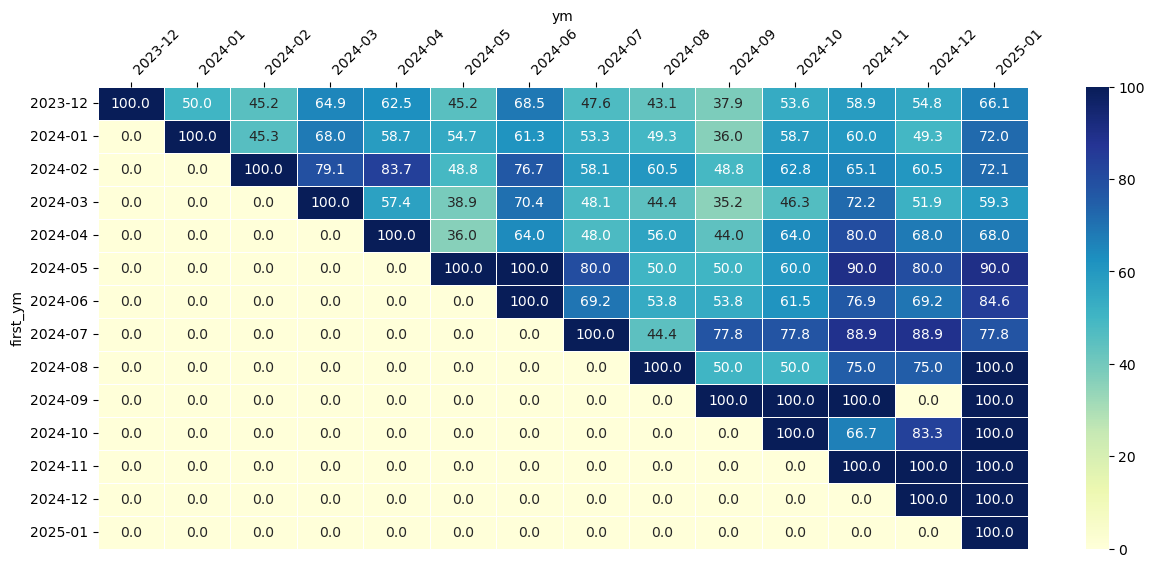

In [111]:
# Проверьте значение cohorts для выявления максимального и минимального значений
print("Минимальное значение:", np.min(cohorts))
print("Максимальное значение:", np.max(cohorts))


# Создание графика
f, ax = plt.subplots(figsize=(15, 6))

sns.heatmap(
    cohorts * 100,  # Умножаем значения на 100, чтобы отразить проценты
    annot=True,
    fmt='.1f',  # Форматирование с одним знаком после запятой
    linewidth=0.5,  # Для красоты, расстояние между ячейками
    vmin=0,  
    vmax=100,  # Максимум на 100 для отображения процентов
    cmap='YlGnBu'  # Явная цветовая карта
);

ax.xaxis.set_label_position('top');  # Указываем, что подписи для оси Х будут вверху
ax.xaxis.tick_top();

plt.xticks(rotation=45, ha='left');  # Указываем угол поворота подписи оси Х

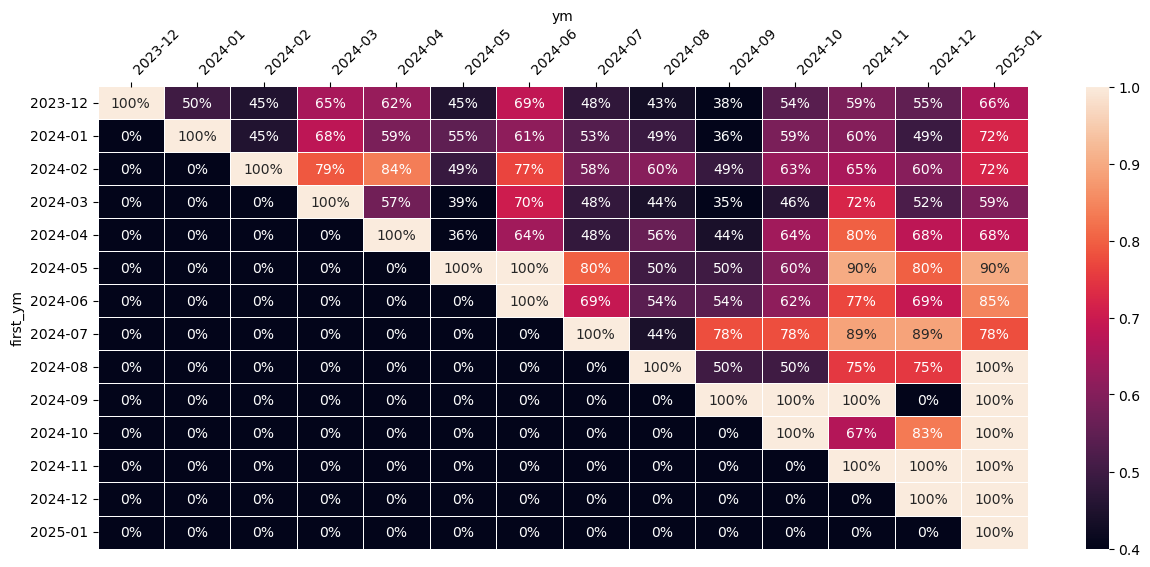

In [108]:


f, ax = plt.subplots(figsize=(15, 6))

sns.heatmap(
    cohorts,
    annot=True,
    fmt='.0%', # формат
    linewidth=0.5, # для красоты, расстояние между ячейками
    vmin=0.4,
    vmax=np.percentile(cohorts, 90)
);

ax.xaxis.set_label_position('top'); # указываем, что подписи для оси Х будут вверху
ax.xaxis.tick_top();

plt.xticks(rotation=45, ha='left'); # Указываем уголо поворота подписи оси Х